# STA365: Applied Bayesian Inference HW 1

---

## Question 1
$P(p=1|q=1) = \frac{P(q=1|p=1)P(p=1)}{\sum_{i=0}^1P(q=1|p=i)P(p=i)}=\frac{0.6 \cdot 0.9}{0.3 \cdot 0.1 + 0.6 \cdot 0.9}\approx 0.947$

## Question 2
$P(\theta|x,n,\mathbf{\alpha})=(\prod_i^K \theta_i^{x_{i}})(\prod_i^K \theta_i^{\alpha_i-1})=\prod_i^K \theta_i^{x_i+\alpha_i-1}\sim Dir(\alpha_i+x_i)$

## Question 3
### Multinomial PMF

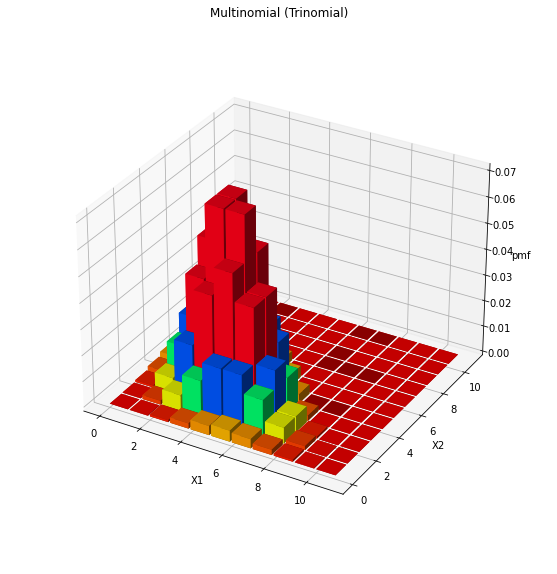

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

def plot_multinomial_pmf(n, p):
    from matplotlib import cm
    import matplotlib.colors as col
    from mpl_toolkits.mplot3d import Axes3D

    # Define figure and axes
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Generate data
    X1 = np.arange(n+1)
    X2 = np.arange(n+1)
    X, Y = np.meshgrid(X1, X2)
    Z = n - (X + Y)

    # Get probability
    top = stats.multinomial.pmf(np.dstack((X,Y,Z)).squeeze(), n=n, p=p)
    width = depth = 1

    # Get distance to camera, cheaply
    zo = -(Y)  # My version of distance from camera    

    # Plot each bar (loop needed for cmap)
    cmap = cm.ScalarMappable(col.Normalize(0, len(X.ravel())), cm.hsv)

    bars = np.empty(X.shape, dtype=object)
    for i, (x, y, dz, o) in enumerate(ravzip(X, Y, top, zo)):
        j, k = divmod(i, n+1)        
        bars[j, k] = pl = ax.bar3d(x, y, 0, 0.9, 0.9, dz, color=cmap.to_rgba(dz*3500))
        pl._sort_zpos = o

    # Configure plot
    ax.set_title('Multinomial (Trinomial)')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('pmf')
    ax.set_box_aspect(None, zoom=0.85)
    plt.show()

    
plot_multinomial_pmf(10, [1/3, 1/3, 1/3])

### Sample Distribution

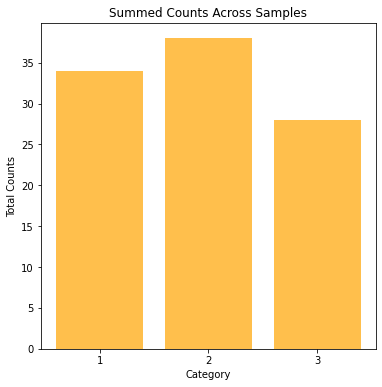

In [51]:
np.random.seed(0)

samples = np.random.multinomial(10, [1/3, 1/3, 1/3], size=10)
category_sums = np.sum(samples, axis=0)

plt.figure(figsize=(6, 6))
plt.bar(range(1, len(category_sums)+1), category_sums, color='orange', alpha=0.7)
plt.title("Summed Counts Across Samples")
plt.xlabel("Category")
plt.ylabel("Total Counts")
plt.xticks(range(1, len(category_sums)+1))
plt.show()

### Prior & Posterior Dirichlet Ternary Plots

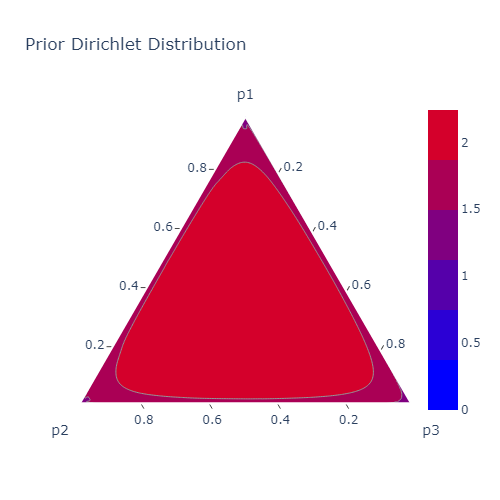

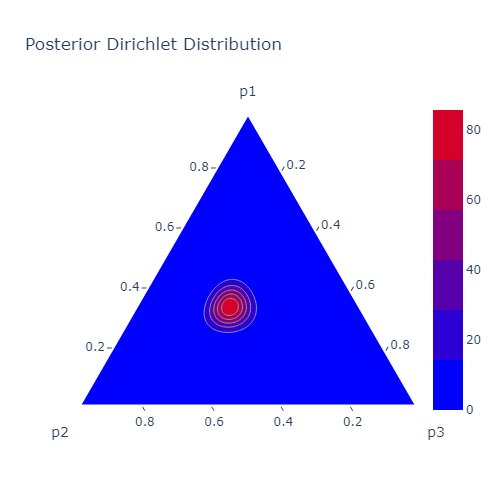

In [46]:
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

alpha_pos = alpha_prior + category_sums  # Posterior alpha values
dirichlet_pos = stats.dirichlet(alpha=alpha_pos)
dirichlet_pos_densities = dirichlet_pos.pdf(p.T)

fig1 = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True,
                                title='Prior Dirichlet Distribution')

fig2 = ff.create_ternary_contour(p.T, dirichlet_pos.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True,
                                title='Posterior Dirichlet Distribution')

fig1.show('png')
fig2.show('png')